In [1]:
# Preparamos todo para correr
import numpy as np
from math import *
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import poisson

# Introducción a la Distribución de Poisson


Este notebook pretende dar una introducción a la distribución de Poisson. 

### ¿Cuándo es adecuado modelar un proceso utilizando la distribución de Poisson?
 
La distribución de probabilidad de Poisson se aplica a variables discretas enteras: el número de apariciones o eventos de un fenómeno en un determinado intervalo. Estos eventos deben cumplir con las siguientes hipotesis:

<ul>
    <li> Los eventos ocurren de a uno a la vez.</li>
    <li> Los eventos son independientes entre sí.</li>
</ul>    

Una manera interesante de llegar a la distribución de Poisson es empezar por la binomial. Supongamos que tenemos un fenómeno con probabilidad $p$ (por ejemplo, que llueva en algún momento del día), y tomamos una muestra de $n_{T}$ días. Dado que o llueve o no llueve, la distribución binomial es adecuada para obtener la probabilidad de que llueva $n_{E}$ días:

$P(n_E;p, n_T)=$ ${n_T}\choose{n_E}$ $p^{n_{E}}(1-p)^{n_{T}-n_{E}}$

Y esto está muy bien. Esta distribución tiene dos parametros: el número de intentos ($n_{T}$) y la probabilidad de exito ($p$). Sin embargo, cuando un suceso es muy inusual (lo que en inglés dicen "rare event"), $p$ es muy pequeña. Para poder observar una cantidad $n_{E}$ de eventos, va a ser necesario tener una mayor cantidad de intentos. En el límite en el que los sucesos ocurren con probabilidad despreciable (pero no nula) es necesario una cantidad enorme de tiradas para poder observarlos. Es decir que si tomamos el límite de $p\rightarrow 0$, es necesario tomar el límite $n_{T}\rightarrow \infty$. Esto se hace de manera tal que $n_{T}p = \lambda$ sea finito. ¿Cómo se interpreta $\lambda$?

En este límite, la distribución binomial tiende a: 

$P(n_E;p, n_T)\rightarrow P(n_E;\lambda) =$ $\frac{\lambda^{n_{E}}e^{-\lambda}}{n_{E}!}$

¡Que es la distribución de Poisson!

<b>Ejercicio:</b> Compruebe que ambas distribuciones coinciden númericamente plotteando las formulas y sampleando con random.binomial y random.poisson 

Estudiando la distribución de Poisson, podemos ver que tiene como media y como varianza el parametro $\lambda$. Este representa entonces la cantidad media esperada de sucesos (que no tiene porqué ser un entero ya que no es la mediana ni la moda) <b>y</b> la varianza en la distribución de sucesos. Podemos verificar que si $\lambda$ crece, la distribución se parece más y más a la binomial.

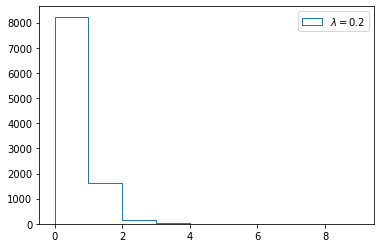

Media    0.194
Varianza    0.194


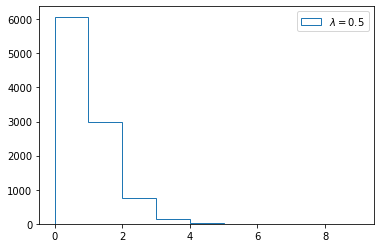

Media    0.505
Varianza    0.525


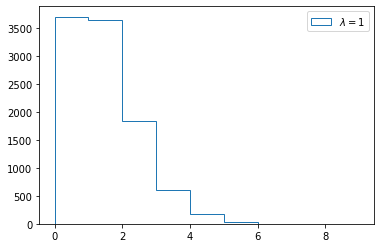

Media    1.000
Varianza    1.007


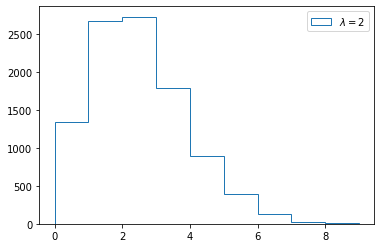

Media    2.010
Varianza    2.015


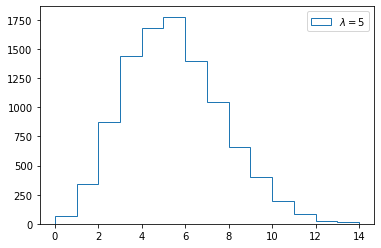

Media    4.998
Varianza    5.045


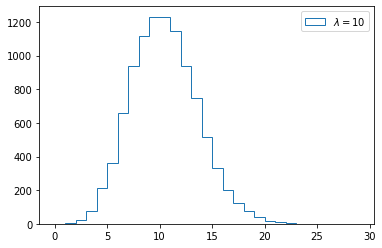

Media    9.958
Varianza   10.010


In [2]:
nevents=10000
for lam in [0.2,0.5,1,2,5,10]:
  s=np.random.poisson(lam=lam,size=nevents)
  plt.hist(s,bins=[i for i in range(max(10,int(3*lam)))],label='$\lambda = $'+str(lam),histtype='step')
  plt.legend(loc='upper right')
  plt.show()
  print('Media %8.3f' % np.mean(s))
  print('Varianza %8.3f' % np.var(s))

Como ejercicio, es posible verificar todo esto analíticamente. 

Volviendo al ejemplo de la lluvia, si uno sabe que en los últimos 100 años llovió en promedio 1 vez por año, uno puede calcular la probabilidad de que llueva 0, 1, 2, 3, 4 veces en el próximo año como:

In [3]:
for k in [0,1,2,3,4]:
  print("La probabilidad de %d días lluviosos en el próximo año es %8.3f" % (k,poisson.pmf(k, 1)))

La probabilidad de 0 días lluviosos en el próximo año es    0.368
La probabilidad de 1 días lluviosos en el próximo año es    0.368
La probabilidad de 2 días lluviosos en el próximo año es    0.184
La probabilidad de 3 días lluviosos en el próximo año es    0.061
La probabilidad de 4 días lluviosos en el próximo año es    0.015


Usualmente, se escribe el intervalo considerado explicitamente reemplazando $\lambda$ por $r\ell$ donde $l$ es el intervalo considerado, en alguna unidad [$l$] y $r$ la cantidad promedio de eventos en el intervalo, que posee entonces unidades de 1/[$l$].

La emisión de partículas radiactivas sigue una distribución de Poisson. Aprovechemos esto para hacer algunos ejercicios más realistas.

### Ejercicio 1:

Se tiene un material radiactivo imaginario de masa molar 5 gramos que tiene una vida media de 1 día. Si se tiene un bloque de 10 kilogramos, esto implica que uno esperaria una emisión radiactiva proveniente de un decaimiento cada 432 segundos. Si se coloca este bloque frente a un detector de partículas.

a) Si se observa el bloque durante 1 hora y media. ¿Cual es la media de eventos esperados? ¿Qué probabilidad hay de detectar entre 11 y 15 pulsos?


Para realizar este item, es útil introducir la función de distribución acumulada (CDF en inglés). La CDF describe la probabilidad de que una variable aleatoria $X$ tenga un valor menor a igual a un cierto $x$.

$F(x) = P(X \leq x)$

Esta función se obtiene entonces sumando o integrando:

$F(x) = \sum_{x_{i}\leq x} p(x_{i})$

$F(x) = \int_{-\infty}^{x}p(x)dx$

La ventaja de la CDF es que puede computarse análiticamente para varias distribuciones. En particular para la distribución de Poisson:

$F(x) = \frac{\Gamma(n_{E}+1,\lambda)}{n_{E}!}$

La CDF puede utilizarse entonces para evitar integraciones o sumas molestas, implentandose en scipiy.stats como la opción cdf. 

Viendo la definición puede verse que si uno quiere calcular la probabilidad de que la variable aleatoria este en un intervalo $(a,b]$ puede calcularlo utilizando la CDF:

$P(a < X \leq b) = F(b)-F(a)$

Donde el menor estricto es muy importante para distribuciones discretas.

In [4]:
#Método 1 para el item a), sumar a lo bestia:

lam = 1/432 * 3600 * 1.5
print("Lambda es: %8.3f" % lam)
s=0.0
for i in [11,12,13,14,15]:
  s+=poisson.pmf(i, lam)
print("a) La probabilidad es: %8.3f" % s)

#Método 2 para el item a), usar la CDF:

lam = 1/432 * 3600 * 1.5
print("Lambda es: %8.3f" % lam)
s=poisson.cdf(15, lam)-poisson.cdf(10, lam)#ojo que acá uso 10, no 11.
print("a) La probabilidad es: %8.3f" % s)

Lambda es:   12.500
a) La probabilidad es:    0.509
Lambda es:   12.500
a) La probabilidad es:    0.509


b) ¿Cómo cambiaria la probabilidad si el detector tuviese una eficiencia $\epsilon$?

La idea es que si uno tiene un detector real, de $N$ partículas uno detecta únicamente $n_{E}$ (asumimos que el detector no tiene falsos positivos). Dado que existen únicamente dos opciones y que las partículas pueden detectarse en cualquier orden, podemos modelar la probabilidad de detectar $n_{E}$ de las $N$ partículas con una eficiencia $\epsilon$ con una binomial.

$P(n_{E}|N) = $ ${N}\choose{n_E}$ $\epsilon^{n_{E}}(1-\epsilon)^{N-n_{E}}$

Sin embargo, uno no puede saber cuantas partículas emitió, sino que sabe cuantas detectó. $N$ es entonces una variable _latente_ y debo marginalizar sobre ella. Para ello debo tener en cuenta la probabilidad de emitir $N$ partículas, dada por la distribución de Poisson con parametro $\lambda$.

$P(n_{E};\epsilon,\lambda) = \sum_{N=n_{E}}^{\infty}P(n_{E}|N)P(N;\lambda)$

Esto no es otra cosa que combinar las reglas de la suma y del producto de probabilidades. Introduciendo las expresiones para cada término:

$P(n_{E};\epsilon,\lambda) = \sum_{N=n_{E}}^{\infty}$ ${N}\choose{n_E}$ $\epsilon^{n_{E}}(1-\epsilon)^{N-n_{E}}\frac{\lambda^{N}e^{-\lambda}}{N!} $

En principio, podríamos darnos por satisfechos. Sin embargo, y para no tener que sumar hasta infinito cada vez que queremos evaluar una probabilidad, podemos tratar de masajear un poco la expresión. Reemplazando ${N}\choose{n_E}$ por $\frac{N!}{n_{E}!(N-n_{E})!}$, reescribiendo $\lambda^{N}$ como $\lambda^{N-n_{E}+n_{E}}$ y acomodando bien los terminos tenemos que:

$P(n_{E};\epsilon,\lambda) = \sum_{N=n_{E}}^{\infty} \frac{\lambda^{N-n_{E}}(1-\epsilon)^{N-n_{E}}}{(N-n_{E})!}\frac{(\epsilon\lambda)^{n_{E}}e^{-\lambda}}{n_{E}!} $

La suma infinita puede pasarse a la variable $m = N - n_{E}$ donde se evidencia que es la expresión en serie infinita de la función exponencial

$\sum_{N=n_{E}}^{\infty} \frac{\lambda^{N-n_{E}}(1-\epsilon)^{N-n_{E}}}{(N-n_{E})!} = e^{\lambda(1-\epsilon)}$

Introduciendo esto y simplificando tenemos que:

$P(n_{E};\epsilon,\lambda) =\frac{(\epsilon\lambda)^{n_{E}}e^{-\epsilon\lambda}}{n_{E}!} = P(n_E;\epsilon\lambda)$

Por lo que la distribución de partículas detectadas es también una Poisson, donde ahora el parametro es la tasa de emisión multiplicada por la eficiencia del detector. Esto se explica porque el detector elige muestras al azar de la población total por lo que si la población total sigue una distribución de Poisson, la distribución extraida también lo hará.

Esta proposición puede invertirse para establecer que bajo estas hipotesis, <b>si un subconjunto de datos sigue una distribución de Poisson, el conjunto de datos también lo hace.</b>

c) ¿Que pasaría si uno agrega otro bloque más con $r = 1/600$ $s^{-1}$?

Nuevamente hay que preguntarse que es lo que uno mide. El detector mide partículas, sin importar de que muestra vengan. Por lo tanto, si tengo $n_{E}$ detecciones, estas pueden venir de cualquier combinación $(r,n_{E}-r)$ de emisiones de ambos bloques. Por lo tanto:

$P(n_{E};\lambda_{1},\lambda_{2})=\sum_{r=0}^{n_{E}}P(n_{E}-r;\lambda_{1})P(r;\lambda_{2})$

Con lápiz y papel pueden comprobar que esto es equivalente a:

$P(n_{E};\lambda_{1},\lambda_{2})=P(n_{E};\lambda_{1}+\lambda_{2})$

<b>Tip:</b> Recordar el teorema del binomio: $\sum_{n=0}^{N}$${N}\choose{n}$ $a^{n}b^{N-n} = (a+b)^{N}$

Utilizando esto, podemos hacer el ejercicio c) casi analogo a como hicimos el ejercicio a)

In [6]:
#El item c) puede hacerse de dos maneras. A lo bruto:
lam1 = 1/432 * 3600 * 1.5
lam2 = 1/600 * 3600 * 1.5
s=0.0
for n in [11,12,13,14,15]:
  for r in np.arange(0,n+1,1):
    s+=poisson.pmf(n-r, lam1)*poisson.pmf(r, lam2)
print("c) La probabilidad es: %8.3f" % s)

#O a lo vivo:
s=poisson.cdf(15, lam1+lam2)-poisson.cdf(10, lam1+lam2)#ojo que acá uso 10, no 11.
print("c) La probabilidad es: %8.3f" % s)

c) La probabilidad es:    0.088
c) La probabilidad es:    0.088
